## Necessary imports

I will show the programming in jupyter-notebook. The Webbased programm is great for prototyping and datascience tasks.

To use proper datasources you need to install **yfinance** with **pip install yfinance**. Alternative, you can fetch timeseries data with pandas_datareader here a list of what **pandas_datareader** supports **https://pandas-datareader.readthedocs.io/en/latest/remote_data.html**.

In [125]:
#The swiss knife for data science
import pandas as pd 

In [126]:
#For mathematical calculations
import numpy as np

In [127]:
import matplotlib.pyplot as plt # draw charts
import seaborn as sns #draw charts like a corr map
sns.set_style('whitegrid')
%matplotlib inline
from matplotlib.colors import LinearSegmentedColormap

It is possible to draw Charts and diagrams with pandas too. There are a lot great other drawing libraries like **plotly**.

In [128]:
import datetime
from scipy import stats #optimzing problems

In [129]:
import yfinance as yf

---

### Set the date

First we set a date which we want to use for the research.

In [130]:
start = datetime.datetime(2015, 1, 1)
end = datetime.datetime(2025, 4, 10)

### Other Example Data to analyze
I wrote the symbols first followed by the names. The symbol names you need as identifier for yfinance API and fetch their data.
#### Indices
- ^GDAXI Dax
- ^BVSP bovespa
- ^GSPC SP500
#### Crypto
- BTC-USD
- ETH-USD
#### Currency
- NOK=X norwegische krone USD
- EUR=X Euro/US-Dollar
- AUD=X Australia
#### Gold
- GC=F

## Stock examples for the research
I tried to pick some major stocks from different sectors. I choice technology, food, industry, energy and health.
#### Stocks

##### Tech
- GOOG
- AMZN
##### Food
- UNLYF

##### Industry and energy
- MMM 3M 
- SIE.DE Siemens
- BHPLF bhp
- RYDAF shell
##### Health
- MKKGY merck
- RHHBF roche

more data and which symbols you need: https://finance.yahoo.com/markets/world-indices/

## Arithmetic vs geometric mean

The difference between arithmetic and geometric return comes from the volatility of the prices. The higher this is, the greater the difference. Compared to the arithmetic mean, the geometric mean reduces the influence of extremely large values (outliers) in a data record. Example: If the index falls by 50% in one year and rises by 100% next year, the arithmetic return is 25% [(− 50% + 100%) / 2]. The geometric return, however, is 0% This makes it a better measure of the central tendency for skewed data distributions, especially if the data are positively crooked due to a few large values. In the financial literature, the geometric is recommended and I will use that for the calculations, but the geometric mean does not allow any negative numbers, so I have to trick at one point.


### Arithmetic mean

For the calculation, we use the Adj Close column. This close courses are adjusted for dividends and splits, that means the data is normalized and comparable with indices and stock that didn't pay dividends or had splits. We can use pandas method pct_change() to get the percentage change from row to row.

In [131]:
#mean arithmetic
dax = yf.download('^GDAXI',rounding ="True", start=start, end=end, auto_adjust=False,interval='1mo')
dax['Return'] = dax['Adj Close'].pct_change()
print("Arithmetic: "+str(dax['Return'].mean())) # decimal
print("Arithmetic %: "+str(dax['Return'].mean()*100))#percentage
print("Variance : "+str(dax['Return'].var()))

[*********************100%***********************]  1 of 1 completed

Arithmetic: 0.006581185240177889
Arithmetic %: 0.6581185240177889
Variance : 0.0025152557698718972


### Geometric Mean

In [132]:
#geometrisches mittel
# Add 1 to each return to make them all positive
dax['Return plus'] = dax['Return'] + 1
# Drop NaN values (first row will be NaN after pct_change)
dax = dax.dropna()

# Calculate the geometric mean of the adjusted returns
gmean = stats.gmean(dax['Return plus'])

# Adjust back to the original scale
geometric_mean_return = gmean - 1
print("Geometric: "+str(geometric_mean_return.round(5)))
print("Geometric: "+str(geometric_mean_return.round(5)*100))

Geometric: 0.00533
Geometric: 0.5329999999999999


In [133]:
#### Logorithm mean
print((np.log(dax['Close']/dax['Close'].shift(1)).mean()).round(5)*100)

Ticker
^GDAXI    0.483
dtype: float64


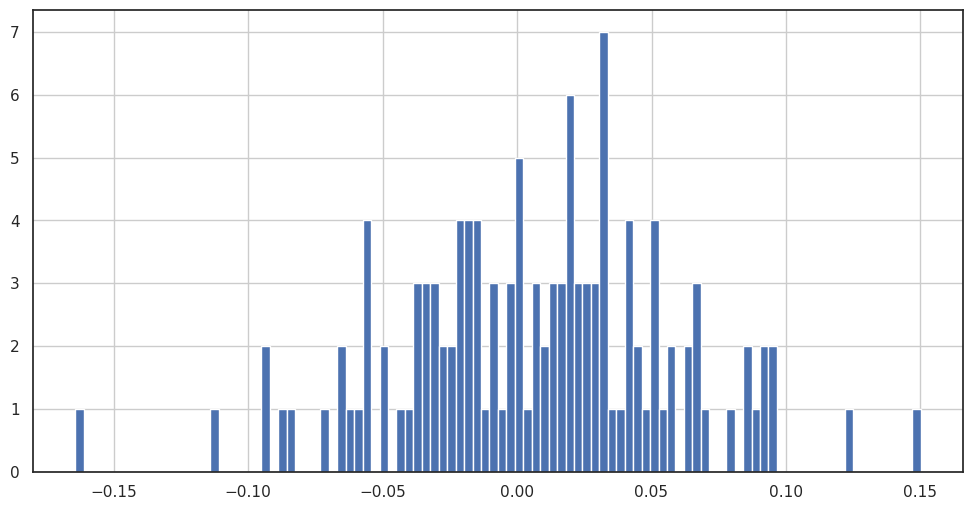

In [141]:
dax['Return'].hist(bins=100,figsize=(12,6));

<Axes: xlabel='Date'>

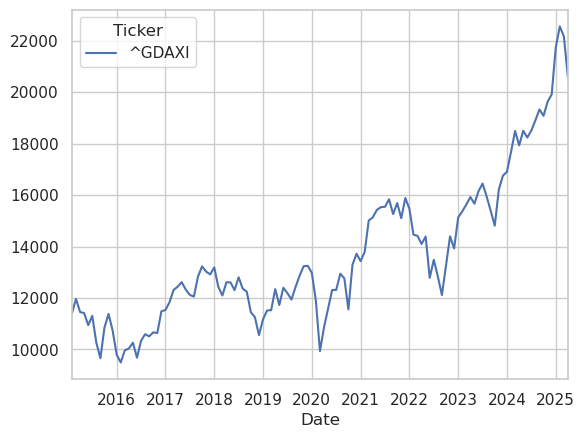

In [134]:
dax['Adj Close'].plot(kind='line')

### Stocks calculation

In [135]:
### Fetch the data

In [174]:
stocks = ['GOOG','AMZN','UNLYF','MMM','SIE.DE','BHPLF','RYDAF','MKKGY','RHHBF']
datastocks = yf.download(stocks,rounding ="True", start=start, end=end, auto_adjust=False,interval='1mo',group_by='stocks')
datastocks.head()

[*********************100%***********************]  9 of 9 completed


Ticker         MMM                                              UNLYF         \
Price         Open    High     Low   Close Adj Close    Volume   Open   High   
Date                                                                           
2015-01-01  137.72  139.27  131.89  135.70     96.40  65451459  39.96  44.40   
2015-02-01  135.55  142.12  134.52  141.01    100.17  44689139  44.92  44.92   
2015-03-01  140.60  142.56  134.79  137.92     98.58  57580343  43.58  43.68   
2015-04-01  137.37  140.22  130.44  130.76     93.46  63675878  41.47  45.35   
2015-05-01  131.10  136.93  130.89  133.01     95.07  51209612  43.15  45.23   

Ticker                    ...   AMZN                              SIE.DE  \
Price         Low  Close  ...    Low  Close Adj Close      Volume   Open   
Date                      ...                                              
2015-01-01  38.75  43.91  ...  14.26  17.73     17.73  2061142000  84.51   
2015-02-01  42.30  43.70  ...  17.50  19.01     19.01  1416924000  84.12   
2015-03-01  41.59  41.59  ...  18.28  18.60     18.60  1110056000  89.86   
2015-04-01  41.47  43.70  ...  18.42  21.09     21.09  1688096000  90.12   
2015-05-01  43.15  44.36  ...  20.73  21.46     21.46  1039660000  87.90   

Ticker                                               
Price        High    Low  Close Adj Close    Volume  
Date                                                 
2015-01-01  93.12  80.80  83.84     58.23  81813096  
2015-02-01  89.98  83.64  89.98     64.88  57466597  
2015-03-01  95.87  87.47  90.78     65.45  65801631  
2015-04-01  93.93  84.76  87.90     63.37  45600592  
2015-05-01  89.46  84.33  86.34     62.25  52306929  

[5 rows x 54 columns]

##### Correlation

Select the Adj Close data and create a new dataframe.

In [175]:
# extract the closing prices
adjclose_prices_stocks = pd.DataFrame()
for stock in stocks:
    adjclose_prices_stocks[stock] = datastocks[stock]['Adj Close']
adjclose_prices_stocks.head()

,GOOG,AMZN,UNLYF,MMM,SIE.DE,BHPLF,RYDAF,MKKGY,RHHBF
Date,,,,,,,,,
2015-01-01,26.53,17.73,31.84,96.40,58.23,11.15,24.38,17.77,202.89
2015-02-01,27.71,19.01,31.69,100.17,64.88,12.69,25.94,18.19,202.29
2015-03-01,27.20,18.60,30.40,98.58,65.45,11.45,23.69,19.70,206.07
2015-04-01,26.74,21.09,31.94,93.46,63.37,12.38,25.12,19.18,218.75
2015-05-01,26.48,21.46,32.69,95.07,62.25,10.80,23.52,19.11,226.08


### Calculating the percantage changes and geometric mean

In [143]:
pct_change_prices_stocks = adjclose_prices_stocks.pct_change()
pct_change_prices_stocks_log = np.log(adjclose_prices_stocks/adjclose_prices_stocks.shift(1))
pct_change_prices_stocks_plus = adjclose_prices_stocks.pct_change().add(1)
pct_change_prices_stocks = pct_change_prices_stocks.dropna()
pct_change_prices_stocks_plus = pct_change_prices_stocks_plus.dropna()
# Calculate the geometric mean of the adjusted returns
gmean = stats.gmean(pct_change_prices_stocks_plus)

# Adjust back to the original scale
geometric_mean_return = gmean - 1
print("Geometric: "+str(geometric_mean_return.round(5)))

Geometric: [0.01447 0.01908 0.00533 0.00262 0.00953 0.00554 0.00171 0.00293 0.00331]


In [188]:
pct_change_prices_stocks_log.head()

,GOOG,AMZN,UNLYF,MMM,SIE.DE,BHPLF,RYDAF,MKKGY,RHHBF
Date,,,,,,,,,
2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-01,0.043517,0.069707,-0.004722,0.038363,0.108139,0.129375,0.062023,0.023360,-0.002962
2015-03-01,-0.018576,-0.021804,-0.041559,-0.016000,0.008747,-0.102825,-0.090733,0.079747,0.018514
2015-04-01,-0.017056,0.125637,0.049417,-0.053335,-0.032296,0.078093,0.058611,-0.026751,0.059714
2015-05-01,-0.009771,0.017392,0.023210,0.017080,-0.017832,-0.136536,-0.065813,-0.003656,0.032959


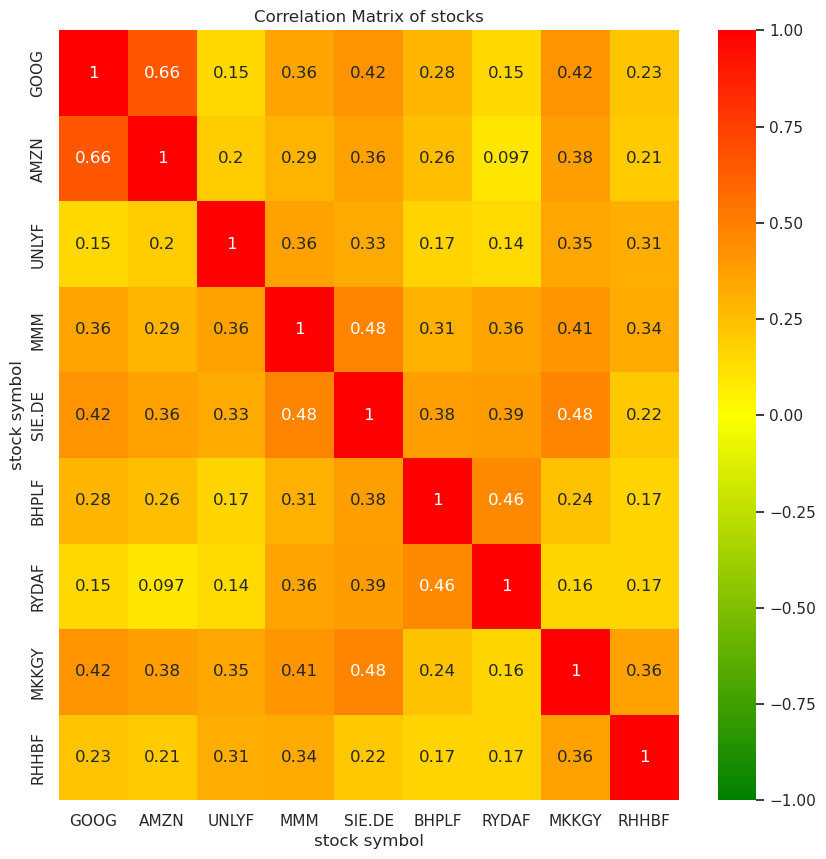

In [144]:
# compute the correlation matrix
corr_stocks = pct_change_prices_stocks_log.corr()

# create a heatmap of the correlation matrix using Seaborn
sns.set(style='white')
fig, ax = plt.subplots(figsize=(10, 10))
# Define the green-yellow-red colormap
colors = ["green", "yellow", "red"]
sns.heatmap(corr_stocks, annot=True, cmap = LinearSegmentedColormap.from_list("GreenYellowRed", colors), vmin=-1, vmax=1, ax=ax)

# set the axis labels and title
ax.set_xlabel('stock symbol')
ax.set_ylabel('stock symbol')
ax.set_title('Correlation Matrix of stocks')

# display the plot
plt.show()

In [190]:
# Seed bestimmen (optional)
np.random.seed(101)

# Stock columns
print('Stocks')
print(adjclose_prices_stocks.columns)
print('\n')

# create random weights
print('Creating Random Weights')
weights = np.array(np.random.random(9))
print(weights)
print('\n')

# Gewichtungen rebalancieren
print('Rebalance to sum to 1.0')
weights = weights / np.sum(weights)
print(weights)
print('\n')

# Erwartete Rendite
print('Expected Portfolio Return')
exp_ret = np.sum(pct_change_prices_stocks_log.mean() * weights) *12
print(exp_ret)
print('\n')

# Erwartete Volatilität
print('Expected Volatility')
exp_vol = np.sqrt(np.dot(weights.T, np.dot(pct_change_prices_stocks_log.cov() * 12, weights)))
print(exp_vol)
print('\n')

# Sharpe Quotient
SR = exp_ret/exp_vol
print('Sharpe Ratio')
print(SR)

Stocks
Index(['GOOG', 'AMZN', 'UNLYF', 'MMM', 'SIE.DE', 'BHPLF', 'RYDAF', 'MKKGY',
       'RHHBF'],
      dtype='object')


Creating Random Weights
[0.51639863 0.57066759 0.02847423 0.17152166 0.68527698 0.83389686
 0.30696622 0.89361308 0.72154386]


Rebalance to sum to 1.0
[0.10921307 0.12069041 0.00602201 0.03627509 0.14492913 0.17636073
 0.06492024 0.1889901  0.15259921]


Expected Portfolio Return
0.08992730251733173


Expected Volatility
0.16895626456840052


Sharpe Ratio
0.5322519573160036


In [183]:
num_ports = 5000

all_weights = np.zeros((num_ports,len(adjclose_prices_stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):

    # Zufällige Gewichtungen erstellen
    weights = np.array(np.random.random(9))

    # Gewichtungen rebalancieren
    weights = weights / np.sum(weights)
    
    # Gewichtungen speichern
    all_weights[ind,:] = weights

    # Erwartete Rückgabe
    ret_arr[ind] = np.sum((pct_change_prices_stocks_log.mean() * weights) *12)

    # Erwartete Varianz
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(pct_change_prices_stocks_log.cov() * 12, weights)))

    # Sharpe Quotient
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [184]:
sharpe_arr.max()

0.7698122015201118

In [185]:
sharpe_arr.argmax() #position

507

#### Ideal Weights

In [267]:
all_weights[507,:]

array([0.21598138, 0.25404939, 0.3393075 , 0.07195555, 0.01793957,
       0.00387639, 0.07454298, 0.00344231, 0.01890493])

In [261]:
max_sr_ret = ret_arr[507]
max_sr_vol = vol_arr[507]

**Create a graphic**

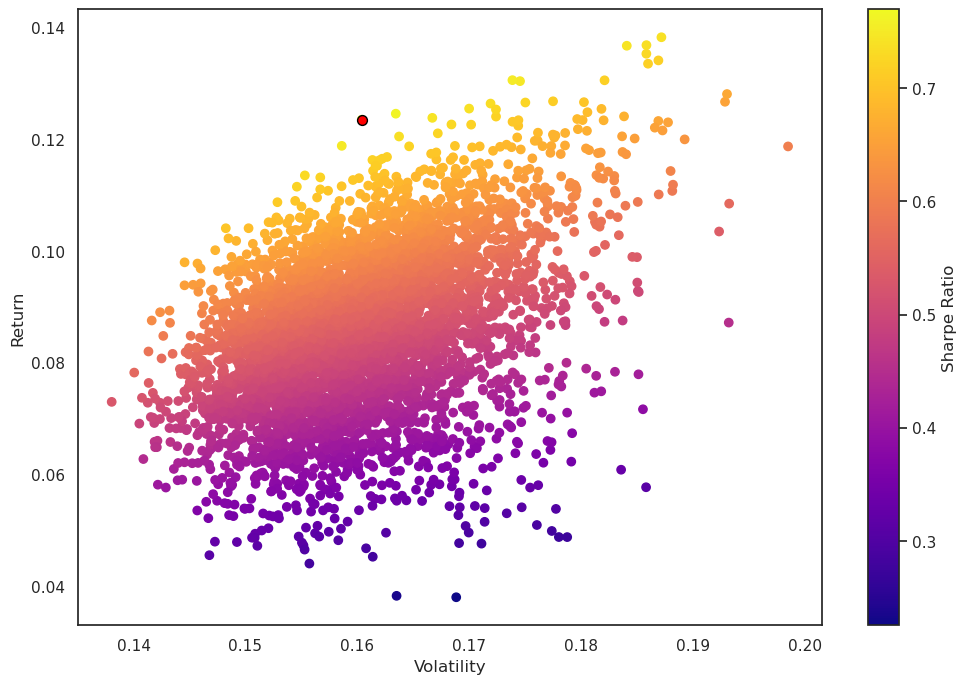

In [257]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Add red dot for max SR
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black')

### Optimizing with SciPy optimize - Rosenbrock inside

In [ ]:
#https://en.wikipedia.org/wiki/Rosenbrock_function

In [241]:
def get_ret_vol_sr(weights):
    """
    Liest Gewichtungen ein, gibt Array mit Rückgabewert, Volatilität und Sharpe Quotient zurück
    """
    weights = np.array(weights)
    ret = np.sum(pct_change_prices_stocks_log.mean() * weights) * 12
    vol = np.sqrt(np.dot(weights.T, np.dot(pct_change_prices_stocks_log.cov() * 12, weights)))
    sr = ret/vol
    return np.array([ret,vol,sr])

In [242]:
from scipy.optimize import minimize

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html

In [243]:
def neg_sharpe(weights):
    return  get_ret_vol_sr(weights)[2] * -1

In [244]:
# Einschränkungen/Constraints
def check_sum(weights):
    '''
    Gibt 0 zurück, falls die Summe der Gewichtungen 1.0 ist.
    '''
    return np.sum(weights) - 1

In [245]:
# Nach der Definition einer Minimierungsfunktion sollte diese 0 zurückgeben für die Bedingungen:
cons = ({'type':'eq','fun': check_sum})

In [246]:
bounds = ((0, 1), (0, 1), (0, 1), (0, 1),(0, 1), (0, 1), (0, 1), (0, 1),(0,1))

In [247]:
init_guess = [0.11,0.11,0.11,0.11,0.11,0.11,0.11,0.11,0.11]

In [248]:
# Sequentielle Quadratsminimum (Least Squares) Programmierung(SLSQP).
opt_results = minimize(neg_sharpe,init_guess,method='SLSQP',bounds=bounds,constraints=cons)

In [249]:
opt_results

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.8340291544319324
       x: [ 3.234e-01  3.463e-01  2.549e-01  0.000e+00  7.534e-02
            0.000e+00  5.006e-17  4.239e-17  4.592e-17]
     nit: 8
     jac: [-3.558e-04  1.863e-04  2.497e-04  2.943e-01 -1.734e-04
            1.323e-01  1.026e-01  3.526e-01  6.208e-02]
    nfev: 82
    njev: 8

In [250]:
opt_results.x

array([3.23445920e-01, 3.46335875e-01, 2.54875862e-01, 0.00000000e+00,
       7.53423423e-02, 0.00000000e+00, 5.00630353e-17, 4.23910836e-17,
       4.59159620e-17])

In [262]:
get_ret_vol_sr(opt_results.x)

array([0.15915414, 0.19082563, 0.83402915])

In [263]:
frontier_y = np.linspace(0,0.3,100) # Ändere 100 in eine kleinere Zahl um, wenn Dein Computer langsam ist!

In [264]:
def minimize_volatility(weights):
    return  get_ret_vol_sr(weights)[1] 

In [268]:
frontier_volatility = []

for possible_return in frontier_y:
    # function for return
    cons = ({'type':'eq','fun': check_sum},
            {'type':'eq','fun': lambda w: (get_ret_vol_sr(w)[0]) - possible_return})
    
    result = minimize(minimize_volatility,init_guess,method='SLSQP',bounds=bounds,constraints=cons)
    
    frontier_volatility.append(result['fun'])

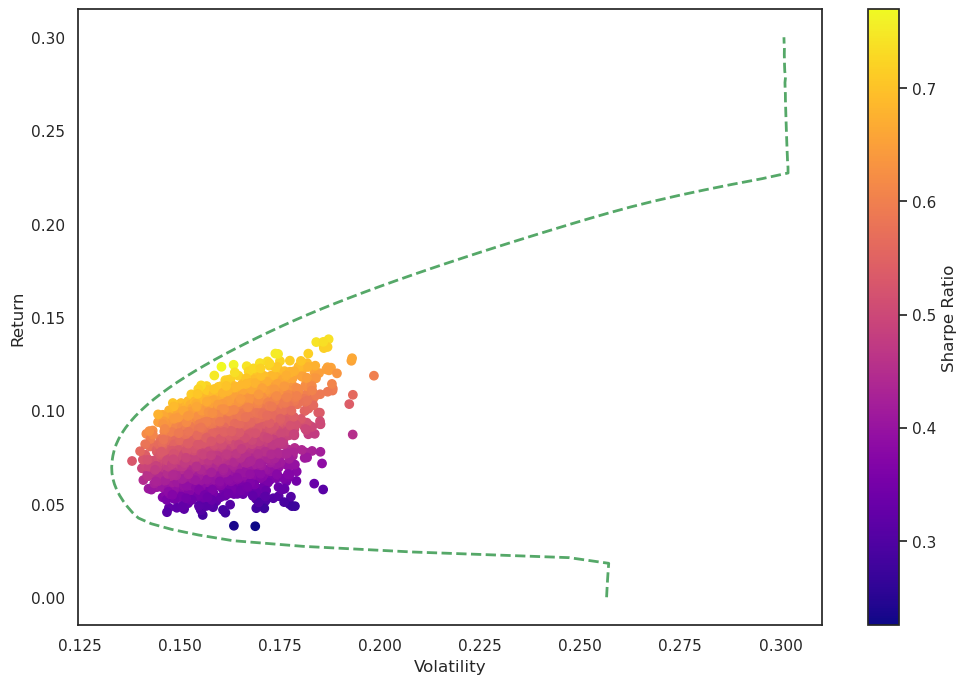

In [269]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')



# Füge Grenzlinie hinzu
plt.plot(frontier_volatility,frontier_y,'g--',linewidth=2)